# Feature Expansion - Polynomials

## 1) Warmup

Which types of feature engineering have you seen last week?

* Imputation
    * mean
    * group mean   
* One-Hot encoding/dummy variables
* Scaling
    * MaxMin
    * Standard
* Binning
    * cut
    * qcut
* Log-transform
* Remove outliers (maybe)
* Label encoding 
    * pd.factorize() - transform categorical strings into integers
* Map values

## 2) Are those all possibilities?

no.


In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (12,6)

## 2.1) Polynomials

In [2]:
# Load the Anscombe dataset
df = pd.DataFrame(sns.load_dataset("anscombe"))

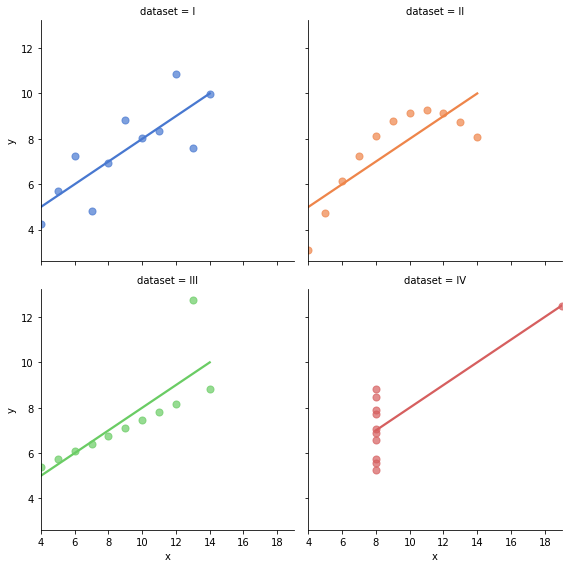

In [3]:
# Visualize the dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 0.7})

<AxesSubplot:xlabel='x', ylabel='y'>

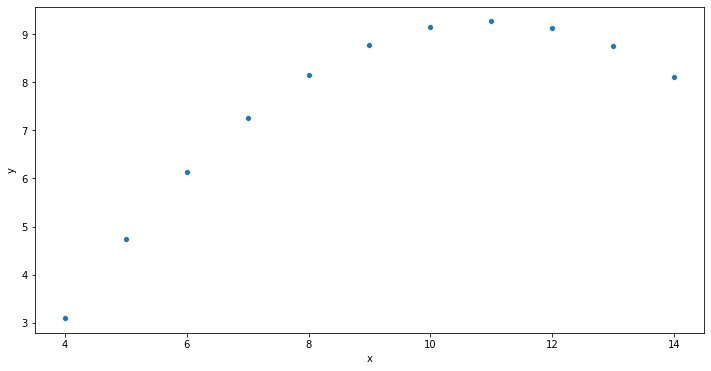

In [8]:
# Visualize dataset II
sns.scatterplot(x="x", y="y", data=df.loc[df['dataset'] == 'II'])

In [15]:
# Create X and y
X = df.loc[df['dataset'] == 'II']['x']
y = df.loc[df['dataset'] == 'II']['y']

<AxesSubplot:xlabel='x', ylabel='y'>

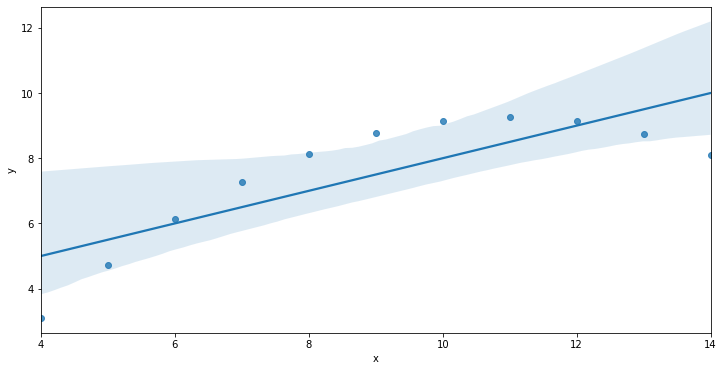

In [16]:
# Plot the regression
sns.regplot(X,y)

In [21]:
# Instead define a Polynomial
X = pd.DataFrame(X)
X['x^2']=X['x']**2
X


,x,x^2
11,10.0,100.0
12,8.0,64.0
13,13.0,169.0
14,9.0,81.0
15,11.0,121.0
16,14.0,196.0
17,6.0,36.0
18,4.0,16.0
19,12.0,144.0
20,7.0,49.0


Polynomial in this case woud be $w_0 + w_1*x^1 + w_2*x^2$

In [22]:
# Fit the model
from sklearn.linear_model import LinearRegression
m= LinearRegression()
m.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<AxesSubplot:xlabel='x', ylabel='y'>

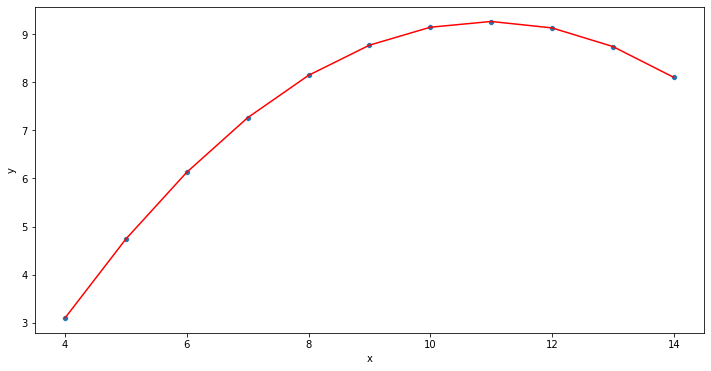

In [27]:
# Plot the result
ypred = m.predict(X)
sns.scatterplot(x=X['x'], y=y)
sns.lineplot(x=X['x'], y=ypred, color='r')

In [28]:
# Show PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures


In [40]:
#Create a polynomial feature transformer
polynomial_transformer = PolynomialFeatures(degree = 3, include_bias = False)

In [41]:
df2 = df[df['dataset'] == 'II']
polynomial_features = polynomial_transformer.fit_transform(pd.DataFrame(df2['x']))

In [42]:
m.fit(polynomial_features, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
pd.DataFrame(polynomial_features, columns = polynomial_transformer.get_feature_names())

,x0,x0^2,x0^3
0,10.0,100.0,1000.0
1,8.0,64.0,512.0
2,13.0,169.0,2197.0
3,9.0,81.0,729.0
4,11.0,121.0,1331.0
5,14.0,196.0,2744.0
6,6.0,36.0,216.0
7,4.0,16.0,64.0
8,12.0,144.0,1728.0
9,7.0,49.0,343.0


### 2.2) Complex Functions

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

In [50]:
np.random.seed(0)
n_samples = 30

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

In [51]:
# create an x-array
X = np.sort(np.random.rand(n_samples))

# create an array of y-observations
y_train = true_fun(X) + np.random.randn(n_samples) * 0.1

# create the true y
y_true = true_fun(X)

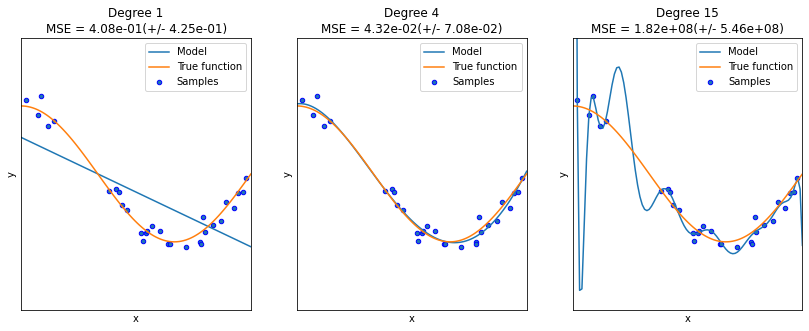

In [52]:
# Define the number of degrees that should be included
degrees = [1, 4, 15]

# Write a for loop that fit_transforms the model for all the different number of degrees
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # Make a pipeline
    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=True)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y_train)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y_train,
                             scoring="neg_mean_squared_error", cv=10)
    
    # Actually plot the function
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y_train, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()